## Problem Statement: Exploring Simple Linear Regression Models on Advertising Firm Dataset

In this notebook, we explore the application of simple linear regression using two different approaches: one with Statsmodels and another with scikit-learn. We analyze a dataset from an advertising company, which contains information on the amount spent on advertising across various channels (e.g., TV, radio, newspaper) and the corresponding sales generated.

### Dataset Description:
The dataset comprises the following columns:
- **TV**: Amount spent on advertising on TV (in thousands of dollars).
- **Radio**: Amount spent on advertising on Radio (in thousands of dollars).
- **Newspaper**: Amount spent on advertising in Newspapers (in thousands of dollars).
- **Sales**: Sales generated (in units).

### Objective:
Our primary objective is to understand and compare the implementation of simple linear regression using two different libraries: Statsmodels and scikit-learn. Through this analysis, we seek to answer the following questions:
1. What is the relationship between advertising expenditure on each channel and sales?
2. Which advertising channel has the most significant impact on sales?
3. Can we predict sales based on the amount spent on advertising using both Statsmodels and scikit-learn linear regression models?

By addressing these questions using two different approaches, we aim to gain insights into the effectiveness of different advertising channels in driving sales and compare the functionalities and performance of both libraries in building predictive models using linear regression.


In [2]:
# Import libraries
import numpy as np               # Numerical computing library
import pandas as pd              # Data manipulation library
import matplotlib.pyplot as plt  # Plotting library
import seaborn as sns            # Statistical data visualization library

import statsmodels              # Statistical modeling library
import statsmodels.api as sm    # Statsmodels API, provides tools for statistical modeling

import sklearn                  # Machine learning library
from sklearn.model_selection import train_test_split  # Function for splitting data into training and testing sets

# Functions for evaluating model performance
from sklearn.metrics import mean_squared_error  # Function to calculate mean squared error
from sklearn.metrics import r2_score            # Function to calculate R-squared score

# Importing Linear Regression model from scikit-learn
from sklearn.linear_model import LinearRegression  

# Ignore warnings to keep the output clean
import warnings
warnings.filterwarnings('ignore')


#### Explanation of Imported Libraries and Modules

- **numpy as np**: NumPy is a library for numerical computing. We import it and alias it as `np` for convenience.
- **pandas as pd**: Pandas is a powerful data manipulation library. We import it and alias it as `pd`.
- **matplotlib.pyplot as plt**: Matplotlib is a plotting library for Python. We import the `pyplot` module and alias it as `plt`.
- **seaborn as sns**: Seaborn is a statistical data visualization library. We import it and alias it as `sns`.
- **statsmodels**: Statsmodels is a library for statistical modeling.
- **statsmodels.api as sm**: We import the statsmodels API and alias it as `sm`.
- **sklearn**: Scikit-learn is a machine learning library.
- **train_test_split**: This function allows us to split our dataset into training and testing sets for model evaluation.
- **mean_squared_error**: Function to calculate mean squared error, a measure of the model's prediction accuracy.
- **r2_score**: Function to calculate R-squared score, which represents the proportion of the variance in the dependent variable that is predictable from the independent variables.
- **LinearRegression**: We import the Linear Regression model from scikit-learn.
- **warnings**: Python warnings module is used to handle warnings. We import it to ignore warnings for cleaner output.


In [4]:
# Read the dataset
advertising = pd.read_csv('advertising.csv')  # Read the CSV file named 'advertising.csv' and store it in a DataFrame named 'advertising'
advertising.head()                            # Display the first few rows of the DataFrame to inspect the data

# Explanation:
# - The first three columns (predictive variables) represent the amount spent on advertising across different channels.
# - The fourth column (target variable) represents the sales generated.
# - The company has spent these three variables (predictive variables) on advertising to drive sales.


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
# Check the shape of the dataset
advertising.shape

# Explanation:
# - The shape attribute of a DataFrame returns a tuple representing its dimensions.
# - The first element of the tuple represents the number of rows (instances) in the DataFrame.
# - The second element of the tuple represents the number of columns (features) in the DataFrame.
# - This command provides information about the size of the dataset, which can be useful for understanding its overall structure.


(200, 4)

Here the dataset has 200 rows and 4 columns

In [6]:
# Display information about the dataset
advertising.info()

# Explanation:
# - The info() method provides a concise summary of the DataFrame, including the data types of each column, 
#   the number of non-null values, and memory usage.
# - This command is useful for understanding the data types of different columns and identifying missing values.
# - It helps in initial data exploration and preprocessing steps before performing further analysis or modeling.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
# Generate descriptive statistics for the dataset
advertising.describe()

# Explanation:
# - The describe() method generates descriptive statistics for numerical columns in the DataFrame.
# - It provides information such as count, mean, standard deviation, minimum, maximum, and quartile values.
# - This command gives insights into the distribution and summary statistics of the numerical variables in the dataset.
# - It helps in understanding the central tendency, dispersion, and range of the data, which can guide further analysis and modeling.


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


<Axes: xlabel='TV', ylabel='Sales'>

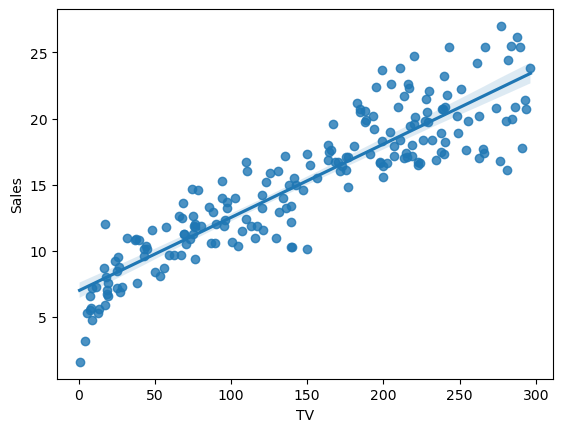

In [8]:
# Visualize the relationship between TV advertising expenditure and sales using a regression plot
sns.regplot(x='TV', y='Sales', data=advertising)

# Explanation:
# - sns.regplot() is a function from the Seaborn library used to plot a regression plot.
# - It visualizes the relationship between two variables (TV advertising expenditure and sales) and fits a regression line to the data.
# - The 'x' parameter specifies the predictor variable (TV advertising expenditure), and the 'y' parameter specifies the target variable (sales).
# - The 'data' parameter specifies the DataFrame containing the variables.
# - This plot helps us visualize the linear relationship between TV advertising expenditure and sales, and the regression line provides insights into the direction and strength of the relationship.
# - It allows us to assess the effectiveness of TV advertising in driving sales and identify any potential patterns or outliers in the data.


<Axes: xlabel='Radio', ylabel='Sales'>

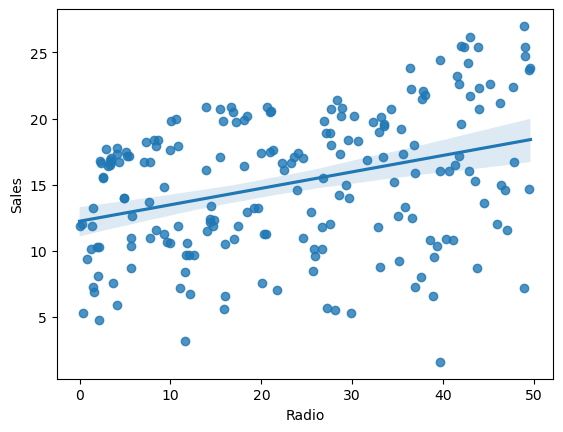

In [10]:
# Regression plot for Radio advertising expenditure vs sales
sns.regplot(x='Radio', y='Sales', data=advertising)

# Explanation:
# - This regression plot visualizes the relationship between Radio advertising expenditure and sales.
# - Similar to the previous plot, it fits a regression line to the data, allowing us to assess the linear relationship between the variables.
# - The 'x' parameter specifies the predictor variable (Radio advertising expenditure), and the 'y' parameter specifies the target variable (sales).
# - The 'data' parameter specifies the DataFrame containing the variables.
# - This plot helps us understand the impact of Radio advertising on sales and evaluate its effectiveness as an advertising channel.



<Axes: xlabel='Newspaper', ylabel='Sales'>

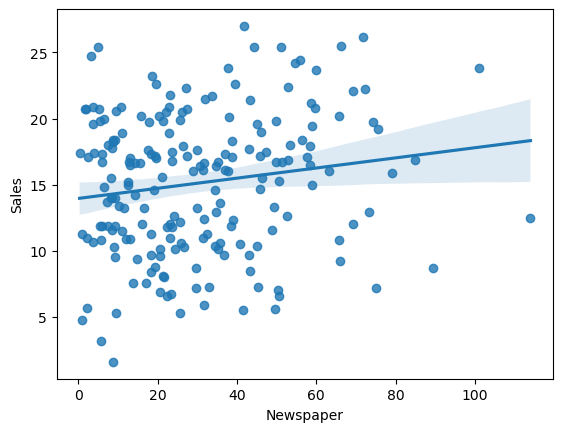

In [11]:
# Regression plot for Newspaper advertising expenditure vs sales
sns.regplot(x='Newspaper', y='Sales', data=advertising)

# Explanation:
# - This regression plot visualizes the relationship between Newspaper advertising expenditure and sales.
# - Similar to the previous plots, it fits a regression line to the data, allowing us to assess the linear relationship between the variables.
# - The 'x' parameter specifies the predictor variable (Newspaper advertising expenditure), and the 'y' parameter specifies the target variable (sales).
# - The 'data' parameter specifies the DataFrame containing the variables.
# - This plot helps us understand the impact of Newspaper advertising on sales and evaluate its effectiveness as an advertising channel.


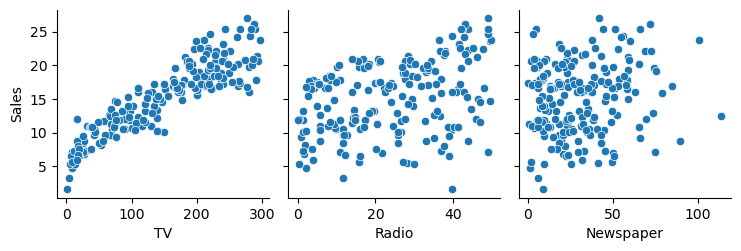

In [12]:
# Visualize scatter plots for TV, Radio, and Newspaper advertising expenditure vs sales
sns.pairplot(data=advertising, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', kind='scatter')

# Explanation:
# - sns.pairplot() is a function from the Seaborn library used to create a grid of scatter plots.
# - It plots pairwise relationships between variables in the DataFrame.
# - The 'data' parameter specifies the DataFrame containing the variables.
# - The 'x_vars' parameter specifies the predictor variables (TV, Radio, Newspaper advertising expenditure).
# - The 'y_vars' parameter specifies the target variable (sales).
# - The 'kind' parameter specifies the type of plot to draw ('scatter' plots in this case).
# - This command creates scatter plots for each pair of variables, allowing us to visualize the relationships between different advertising channels and sales.
# - It facilitates easy comparison between the impact of different advertising channels on sales and helps identify any patterns or trends.


                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.901208
Radio      0.054809  1.000000   0.354104  0.349631
Newspaper  0.056648  0.354104   1.000000  0.157960
Sales      0.901208  0.349631   0.157960  1.000000


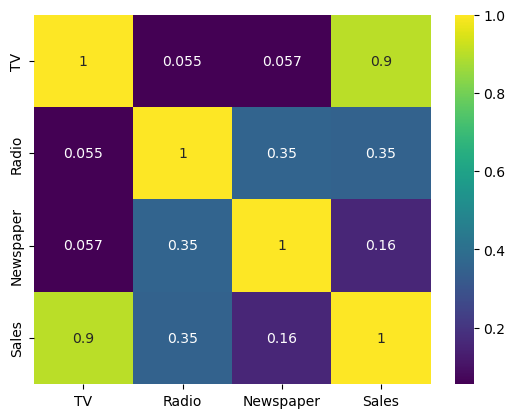

In [15]:
# Calculate the correlation matrix
correlation_matrix = advertising.corr()
print(correlation_matrix)

# Explanation:
# - The corr() method calculates the correlation between columns in the DataFrame.
# - It computes pairwise correlation of columns, excluding NA/null values.
# - The resulting correlation matrix shows the relationship between variables, with values ranging from -1 to 1.

# Generate a heatmap of the correlation matrix with a different color map
sns.heatmap(correlation_matrix, cmap='viridis', annot=True)

# Explanation:
# - sns.heatmap() is a function from the Seaborn library used to plot a heatmap.
# - It visualizes the correlation matrix as a color-encoded matrix, with higher correlations represented by brighter colors.
# - The 'data' parameter specifies the correlation matrix calculated earlier.
# - The 'cmap' parameter specifies the color map to use for the heatmap ('viridis' in this case).
# - The 'annot' parameter specifies whether to display the correlation values on the heatmap.
# - This command generates a heatmap that provides a visual representation of the correlation between different variables.
# - It helps identify strong correlations (positive or negative) between variables, which can guide feature selection and modeling decisions.

# Display the heatmap
plt.show()

### Building a Simple Linear Regression Model

In a simple linear regression model, the goal is to predict a target variable based on one predictor variable. The model is represented by a line with the equation:

\[ y = mx + c \]

Where:
- \( y \) is the target variable
- \( x \) is the predictor variable
- \( m \) is the slope of the line (model coefficient)
- \( c \) is the intercept (model parameter)

The steps to build a simple linear regression model are as follows:

1. **Create Predictor and Target Variables**:
   - Identify the predictor variable (\( X \)) and the target variable (\( y \)) from the dataset.

2. **Create Train and Test Sets**:
   - Split the dataset into training and testing sets. This is typically done using ratios such as 70-30 or 80-20, where the majority of the data is used for training and a smaller portion is reserved for testing.

3. **Train the Model on Training Set**:
   - Use the training set to train the regression model, i.e., to learn the coefficients (\( m \) and \( c \)) of the linear equation.
   
4. **Evaluate the Model**:
   - Evaluate the model's performance on both the training set (to see how well it fits the data it has seen) and the test set (to assess its generalization to unseen data).

These steps help in building a simple linear regression model and assessing its effectiveness in predicting the target variable based on the predictor variable.


In [16]:
# 1st Model: Simple Linear Regression

# Create predictor variable (X) and target variable (y)
X = advertising["TV"]   # Predictor variable (TV advertising expenditure)
y = advertising["Sales"] # Target variable (sales)

# Explanation:
# - In most machine learning conventions, the predictor variable (X) is typically represented as a DataFrame even if it consists of a single column.
# - The predictor variable (X) contains the features used to predict the target variable (y).
# - Here, the predictor variable (X) is the TV advertising expenditure, and the target variable (y) is the sales.
# - X is often represented as a DataFrame to accommodate multiple predictor variables in the case of multiple linear regression.
# - y is a single column/variable representing the target variable to be predicted by the model.


In [18]:
# Train-Test Split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=100)

# Explanation:
# - The train_test_split() function from scikit-learn is used to split the data into training and testing sets.
# - It takes the predictor variable (X) and the target variable (y) as input.
# - The 'train_size' parameter specifies the proportion of the dataset to include in the training set (70% in this case).
# - The 'random_state' parameter is used to ensure reproducibility of the results. By setting it to a specific value (e.g., 100), we ensure that the random sampling is consistent across runs.
# - The function returns four arrays: X_train (training set for predictor variable), X_test (testing set for predictor variable), y_train (training set for target variable), and y_test (testing set for target variable).
# - This command splits the dataset into training and testing sets, which are used to train and evaluate the regression model, respectively.
# - X_train and X_test contain the predictor variable values for the training and testing sets, respectively.
# - y_train and y_test contain the corresponding target variable values for the training and testing sets, respectively.
# - The 'shape' attribute of X_train returns the dimensions (number of rows and columns) of the training set.

X_train.shape

(140,)

In [12]:
X_train

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
       ...  
87     110.7
103    187.9
67     139.3
24      62.3
8        8.6
Name: TV, Length: 140, dtype: float64

In [19]:
# Training the Model

# Add a constant/intercept to the predictor variable for training set
X_train_sm = sm.add_constant(X_train)
X_train_sm.head()
# Explanation:
# - In the statsmodels library, the linear regression model does not automatically include a constant/intercept term.
# - Therefore, we need to manually add a constant column to the predictor variable (X_train) to account for the intercept term in the linear equation.
# - The add_constant() function from the statsmodels library is used to add a constant term to the predictor variable.
# - This constant term acts as an additional predictor variable with a value of 1 for all observations.
# - Adding a constant ensures that the linear regression model estimates both the slope (coefficients) and the intercept of the linear equation.
# - X_train_sm is the predictor variable (including the constant) for the training set, which will be used to train the linear regression model.
# - The 'head()' method is used to display the first few rows of the DataFrame X_train_sm, allowing us to inspect the added constant column.


,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


The original linear regression equation:
\[ y = c + m1.X1\]

The model will learn:
\[ y = c.const + m1.TV \]


In [20]:
# Fitting the Model

# Create an Ordinary Least Squares (OLS) regression model
lr = sm.OLS(y_train, X_train_sm)

# Explanation:
# - The sm.OLS() function from the statsmodels library is used to create an Ordinary Least Squares (OLS) regression model.
# - OLS is a method for estimating the unknown parameters in a linear regression model by minimizing the sum of the squares of the differences between the observed and predicted values (residuals).
# - It takes the target variable (y_train) and the predictor variable (X_train_sm, including the constant) as input.
# - The result is an OLS regression model object that can be trained on the training set.

# Train the OLS regression model
lr_model = lr.fit()

# Explanation:
# - The fit() method is called on the OLS regression model (lr) to train the model on the training set.
# - It estimates the parameters (coefficients) of the linear regression model using the training data.
# - The trained model (lr_model) contains the learned parameters that best fit the training data.
# - These parameters represent the intercept and slope(s) of the linear equation learned by the model.
# - Once trained, the model can be used to make predictions on new data.

# Display the parameters of the trained model
lr_model.params



const    6.948683
TV       0.054546
dtype: float64

In [21]:
#Now the equation will be Sales = 6.94 + 0.054 * TV

#### Note:
In this model, the coefficient of TV is positive, consistent with the observation from the graph.
As the coefficient is positive (+0.05), it indicates that sales increase as advertising expenditure on TV increases.
Specifically, for every one-unit increase in TV advertising expenditure, sales are predicted to increase by 0.05 units.

The intercept term (6.948) is also positive, implying that even when there is zero expenditure on TV advertising, the model predicts sales of approximately 6.948 units.
This observation aligns with the graph, which does not pass through the origin (zero).

These findings suggest that TV advertising has a positive impact on sales, and even a small investment in TV advertising can lead to an increase in sales.


In [22]:
# Display the summary of the trained linear regression model
lr_model.summary()

# Explanation:
# - The summary() method provides a detailed summary of the trained linear regression model.
# - It includes various statistics and metrics to assess the performance and validity of the model.
# - The summary contains information such as:
#     - Coefficients: The estimated coefficients (parameters) of the linear equation.
#     - Standard errors: The standard errors associated with the coefficients.
#     - t-values: The t-statistics for testing the significance of the coefficients.
#     - p-values: The p-values for testing the null hypothesis that the coefficients are equal to zero.
#     - R-squared: The coefficient of determination, indicating the proportion of variance in the target variable explained by the model.
#     - Adjusted R-squared: A modified version of R-squared that adjusts for the number of predictors in the model.
#     - F-statistic: The F-statistic for testing the overall significance of the model.
#     - Prob (F-statistic): The p-value associated with the F-statistic.
#     - AIC and BIC: Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC) for model comparison.
# - The summary provides insights into the goodness-of-fit, significance of coefficients, and overall performance of the model.
# - It helps in interpreting the results of the regression analysis and making informed decisions about the model.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sat, 27 Apr 2024   Prob (F-statistic):           1.52e-52
Time:                        10:48:56   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Linear Regression Model 1 Summary:

The summary provides detailed information about the linear regression model, including:
- The model's fit statistics (e.g., R-squared, adjusted R-squared)
- Coefficients of the predictor variables (including intercept)
- Standard errors, t-statistics, and p-values for each coefficient
- Confidence intervals for the coefficients

##### Model Fit Statistics:
- **R-squared**: 0.816
  - Indicates the proportion of variance in the target variable (sales) explained by the predictor variables (TV).
- **Adjusted R-squared**: 0.814
  - A version of R-squared that adjusts for the number of predictor variables in the model.

##### Coefficients:
- **Intercept (const)**: 6.948
  - The predicted value of sales when all predictor variables are zero.
- **TV**: 0.054
  - The coefficient representing the change in sales for a one-unit increase in TV advertising expenditure.
  
##### Interpretation:
- The R-squared value of 0.816 indicates that approximately 81.6% of the variance in sales can be explained by the predictor variable (TV).
- The positive coefficient for TV (0.054) suggests that there is a positive relationship between TV advertising expenditure and sales.
- The intercept term (6.948) indicates the predicted sales when there is zero expenditure on TV advertising.
- The p-value associated with each coefficient is less than 0.05, indicating that they are statistically significant.

Overall, the model suggests that TV advertising has a significant positive impact on sales, with an increase of approximately 0.054 units in sales for every one-unit increase in TV advertising expenditure.


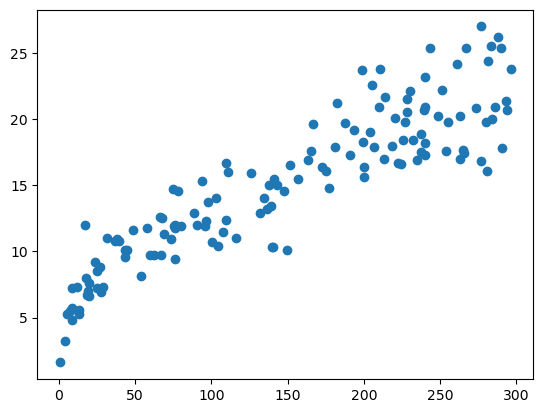

In [23]:
# Create a scatter plot of the training data
plt.scatter(X_train, y_train)

# Explanation:
# - The scatter() function from the Matplotlib library is used to create a scatter plot.
# - It visualizes the relationship between the predictor variable (X_train) and the target variable (y_train) in the training data.
# - The 'X_train' parameter specifies the values of the predictor variable on the x-axis.
# - The 'y_train' parameter specifies the values of the target variable on the y-axis.
# - This command plots each data point as a single point on the scatter plot.
# - It helps in visualizing the distribution of the training data and understanding the relationship between the variables.


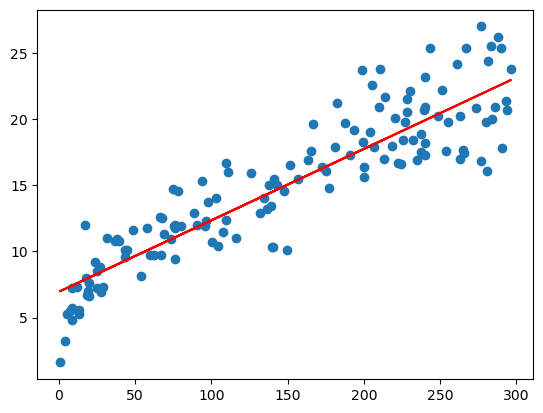

In [24]:
# Create a scatter plot of the training data
plt.scatter(X_train, y_train)

# Plot the regression line
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')

# Explanation:
# - The plot() function from the Matplotlib library is used to create a line plot.
# - It visualizes the regression line fitted to the training data.
# - The 'X_train' parameter specifies the values of the predictor variable on the x-axis.
# - The expression '6.948 + 0.054*X_train' represents the linear equation of the regression line, with the intercept and slope coefficients obtained from the trained model.
# - The 'r' parameter specifies the color of the line (red).
# - This command plots the regression line on the scatter plot, showing how the model fits the training data.

# Display the plot
plt.show()


In [25]:
# Predict the target variable (sales) for the training data
y_train_pred = lr_model.predict(X_train_sm)

# Explanation:
# - The predict() method is called on the trained linear regression model (lr_model) to make predictions.
# - It takes the predictor variable values (X_train_sm, including the constant) as input and returns the predicted values of the target variable (sales).
# - These predicted values represent the model's estimates of sales based on the training data.
# - The predicted values (y_train_pred) are stored in a variable for further analysis or evaluation.


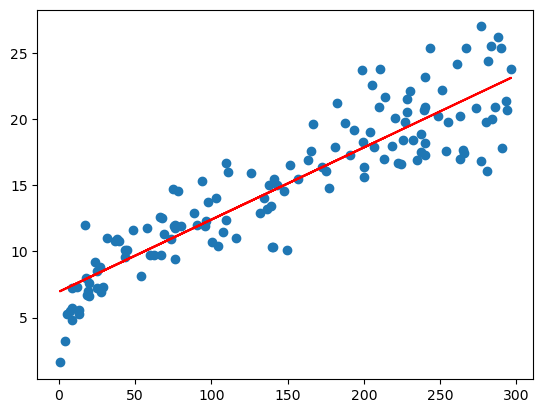

In [26]:
# Create a scatter plot of the training data
plt.scatter(X_train, y_train)

# Plot the predicted values
plt.plot(X_train, y_train_pred, 'r')

# Explanation:
# - The plot() function from the Matplotlib library is used to create a line plot.
# - It visualizes the predicted values of the target variable (sales) on the regression line.
# - The 'X_train' parameter specifies the values of the predictor variable on the x-axis.
# - The 'y_train_pred' parameter contains the predicted values of the target variable (sales) obtained from the trained model.
# - The 'r' parameter specifies the color of the line (red).
# - This command plots the predicted values on the scatter plot, showing how well the model fits the training data.

# Display the plot
plt.show()


### Residual Analysis: Checking for Normality of Residuals

Residual analysis is an important step in evaluating the assumptions of a linear regression model. One key assumption is that the error terms (residuals) should be normally distributed with a mean of zero.

To check if the error terms are normally distributed, we perform residual analysis:

1. **Compute Residuals**: Calculate the residuals by subtracting the predicted values from the actual values of the target variable.

2. **Plot Residuals**: Create a histogram or a Q-Q plot of the residuals to visualize their distribution.

3. **Assess Normality**: Examine the shape of the histogram or the Q-Q plot to assess whether the residuals follow a normal distribution.

If the residuals are approximately normally distributed, it indicates that the linear regression model satisfies the assumption of normality of residuals. However, if the residuals deviate significantly from normality, it suggests that the model may not be appropriate for the data.

Let's proceed with residual analysis to check the normality of residuals.


In [27]:
# Display the predicted values of the target variable for the training data
print(y_train_pred)


74     18.588747
3      15.212365
185    18.130563
26     14.743271
90     14.274178
         ...    
87     12.986898
103    17.197830
67     14.546907
24     10.346884
8       7.417777
Length: 140, dtype: float64


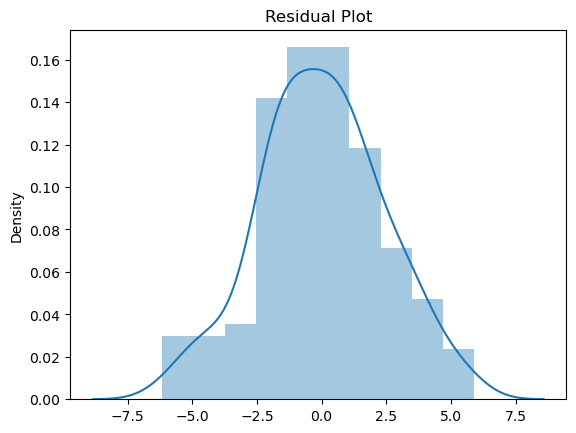

In [29]:
# Compute residuals
res = y_train - y_train_pred

# Plot residuals
plt.figure()
sns.distplot(res)
plt.title("Residual Plot")

# Explanation:
# - The distplot() function from the Seaborn library is used to create a histogram of the residuals.
# - It visualizes the distribution of the residuals, allowing us to assess whether they are approximately normally distributed.
# - The 'res' parameter contains the residuals computed as the difference between the actual values of the target variable (y_train) and the predicted values (y_train_pred).
# - This command plots a histogram of the residuals, showing their distribution.
# - A normally distributed histogram indicates that the error terms (residuals) satisfy the assumption of normality in linear regression.
# - The title of the plot is set to "Residual Plot" for clarity.

# Display the plot
plt.show()


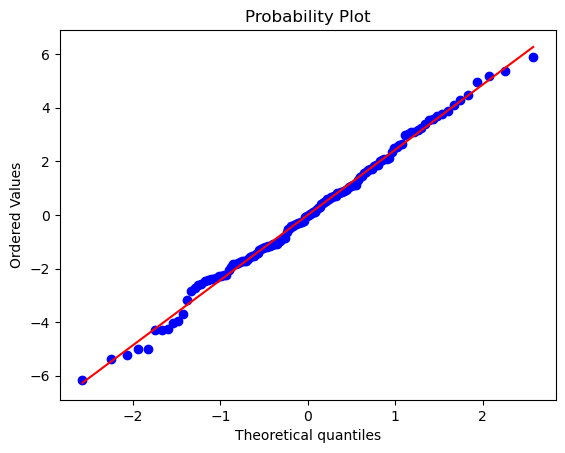

In [28]:
# Calculate the residuals (error terms)
residuals = y_train - y_train_pred

# Explanation:
# - Residuals represent the differences between the actual target variable values (y_train) and the predicted values (y_train_pred) obtained from the model.
# - They indicate the errors made by the model in predicting the target variable.
# - Residual analysis is performed to check whether the residuals are normally distributed and fulfill the assumptions of linear regression.

# Create a Q-Q plot
import scipy.stats as stats
stats.probplot(residuals, dist="norm", plot=plt)

# Explanation:
# - The probplot() function from the scipy.stats module is used to create a Q-Q plot (Quantile-Quantile plot).
# - It compares the distribution of the residuals to a normal distribution.
# - The 'residuals' parameter contains the residual values obtained from the model.
# - The 'dist="norm"' parameter specifies the distribution to which the residuals are compared (normal distribution).
# - The 'plot=plt' parameter specifies the Matplotlib plot to display the Q-Q plot.
# - This command visualizes whether the residuals follow a normal distribution by comparing their quantiles to the quantiles of a normal distribution.

# Display the Q-Q plot
plt.show()


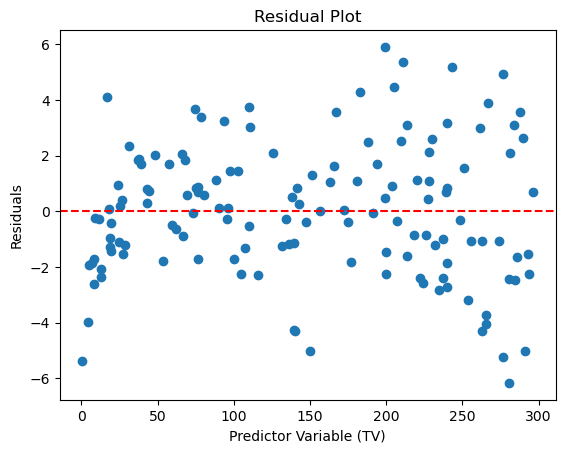

In [30]:
# Create a scatter plot of the predictor variable (X_train) vs. residuals
plt.scatter(X_train, res)
plt.xlabel("Predictor Variable (TV)")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='--') # Add horizontal line at y=0 for reference
plt.show()

# Explanation:
# - The scatter() function from the Matplotlib library is used to create a scatter plot.
# - It visualizes the relationship between the predictor variable (TV) and the residuals.
# - The 'X_train' parameter specifies the values of the predictor variable on the x-axis.
# - The 'res' parameter contains the residuals computed as the difference between the actual values of the target variable and the predicted values.
# - This command plots each data point as a single point on the scatter plot, representing the relationship between the predictor variable and the residuals.
# - The xlabel() and ylabel() functions set the labels for the x-axis and y-axis, respectively.
# - The title() function sets the title of the plot to "Residual Plot" for clarity.
# - The axhline() function adds a horizontal line at y=0 for reference, helping to identify the points above and below the line.


#### Residual Analysis Result:

After performing residual analysis, the following observations are made:

- **Center at 0.0**: The histogram of residuals shows that the center of the distribution is approximately at 0.0. This indicates that, on average, the residuals have a mean close to zero, which is consistent with the assumption of normality in linear regression.

- **Normal Distribution Shape**: The histogram of residuals resembles a bell-shaped curve, indicating that the distribution is approximately normal. This suggests that the error terms (residuals) follow a normal distribution, supporting the assumption of normality in linear regression.

- **Absence of Patterns**: Upon inspection, no discernible patterns are observed in the residuals. This is desirable, as linear regression assumes that the residuals are random and independent of each other. The absence of patterns suggests that the model captures the underlying relationship between the predictor and target variables adequately.

Based on these observations, it can be concluded that the linear regression model satisfies the assumption of normality of residuals, and the model's predictions are reliable for the given dataset.



### Prediction on Training Set and Test Set

After training the linear regression model, predictions are made on both the training set and the test set to evaluate its performance.

#### Prediction on Training Set:
- Predictions are made on the training set to assess how well the model fits the data it has seen during training.
- These predictions represent the model's estimates of the target variable based on the predictor variables in the training set.
- The predictions are compared with the actual values of the target variable to evaluate the model's accuracy and goodness-of-fit on the training data.

#### Prediction on Test Set:
- Predictions are also made on the test set, which contains unseen data not used during training.
- These predictions provide an indication of how well the model generalizes to new, unseen data.
- The predictions are compared with the actual values of the target variable in the test set to evaluate the model's ability to make accurate predictions on unseen data.

Let's proceed with making predictions on both the training set and the test set and then evaluate the model's performance.


In [31]:
# prediction on training sets

# Add a constant to X_test for prediction
X_test_sm = sm.add_constant(X_test)

# Explanation:
# - Since the linear regression model was trained with a constant added to the predictor variable (X_train_sm), 
#   the same constant needs to be added to the predictor variable for the test set (X_test) before making predictions.
# - The add_constant() function from the statsmodels library is used to add a constant column to the predictor variable.
# - This constant ensures that the test data is formatted in the same way as the training data for making predictions.

# Predict the y values corresponding to X_test_sm
y_test_pred = lr_model.predict(X_test_sm)

# Explanation:
# - The predict() method is called on the trained linear regression model (lr_model) to make predictions on the test set.
# - It takes the predictor variable values (X_test_sm, including the constant) as input and returns the predicted values of the target variable (sales).
# - These predicted values represent the model's estimates of sales based on the predictor variables in the test set.
# - The predicted values (y_test_pred) are stored in a variable for further analysis or evaluation.


### Evaluation of the Model

#### Prediction on Training Set:
- Predictions have been made on the training set to assess how well the model fits the data it has seen during training.
- These predictions represent the model's estimates of the target variable based on the predictor variables in the training set.
- The model's accuracy and goodness-of-fit on the training data can be evaluated by comparing the predictions with the actual values of the target variable.

#### Evaluation Metrics:
- One commonly used metric to evaluate the performance of a regression model is the coefficient of determination (\(R^2\) score).
- \(R^2\) score measures the proportion of the variance in the target variable that is explained by the model.
- A higher \(R^2\) score (closer to 1) indicates a better fit of the model to the data, where 1 indicates perfect prediction and 0 indicates no better prediction than simply predicting the mean of the target variable.

#### \(R^2\) Score on Test Set:
- Now, let's calculate the \(R^2\) score on the test set to assess how well the model generalizes to new, unseen data.
- This will provide an indication of the model's predictive performance on data that it hasn't seen during training.

Let's proceed with evaluating the model and calculating the \(R^2\) score on the test set.


In [32]:
# Evaluate the model: R-squared on the test set
r2_test = r2_score(y_true=y_test, y_pred=y_test_pred)
print("R-squared on test set:", r2_test)

# Explanation:
# - The r2_score() function from scikit-learn is used to calculate the coefficient of determination (R-squared) on the test set.
# - It takes the actual values of the target variable (y_true) and the predicted values (y_test_pred) as input.
# - The calculated R-squared score represents the proportion of the variance in the target variable that is explained by the model on the test set.
# - A higher R-squared score indicates a better fit of the model to the test data, where 1 indicates perfect prediction and 0 indicates no better prediction than simply predicting the mean of the target variable.

# R-squared on training set
r2_train = r2_score(y_true=y_train, y_pred=y_train_pred)
print("R-squared on training set:", r2_train)

# Explanation:
# - Similarly, the R-squared score is calculated on the training set to assess how well the model fits the training data.
# - This provides an indication of the model's performance on the data it has seen during training.

# Mean Squared Error (MSE) on test set
mse_test = mean_squared_error(y_true=y_test, y_pred=y_test_pred)
print("Mean Squared Error on test set:", mse_test)

# Explanation:
# - The mean_squared_error() function from scikit-learn is used to calculate the mean squared error (MSE) on the test set.
# - It measures the average squared difference between the actual values of the target variable and the predicted values.
# - A lower MSE indicates better accuracy and goodness-of-fit of the model on the test data.


R-squared on test set: 0.7921031601245659
R-squared on training set: 0.8157933136480389
Mean Squared Error on test set: 4.077556371826953


### Model Evaluation Results

#### R-squared on Test Set:
The coefficient of determination (R-squared) on the test set is found to be approximately 0.792. This indicates that around 79.2% of the variance in the target variable (sales) is explained by the linear regression model when applied to unseen data. A higher R-squared value suggests that the model has a better fit to the test data, capturing a larger proportion of the variability in sales.

#### R-squared on Training Set:
The R-squared value on the training set is approximately 0.816. This indicates that about 81.6% of the variance in the target variable (sales) is explained by the model when applied to the data it was trained on. A high R-squared value on the training set suggests that the model captures a substantial amount of the variability in sales seen during training.

#### Mean Squared Error (MSE) on Test Set:
The Mean Squared Error (MSE) on the test set is calculated to be approximately 4.078. This metric measures the average squared difference between the actual values of sales and the predicted values by the model. A lower MSE indicates better accuracy and goodness-of-fit of the model on the test data.

Overall, the model exhibits strong predictive performance, as evidenced by the relatively high R-squared values on both the training and test sets, along with a relatively low Mean Squared Error on the test set. These evaluation metrics indicate that the linear regression model effectively captures the relationship between advertising expenditure (specifically TV advertising) and sales, providing reliable predictions of sales based on the advertising spend.


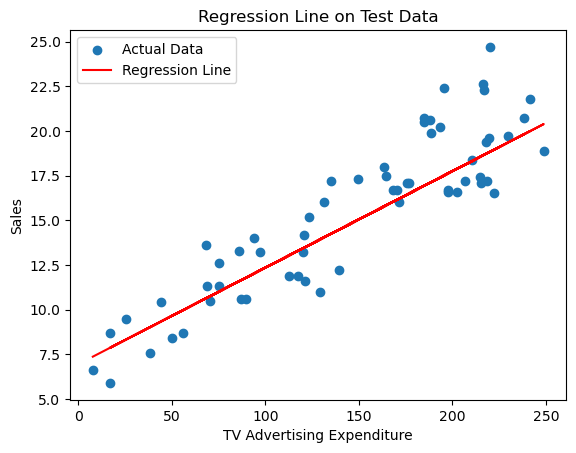

In [34]:
# Create a scatter plot of the test data
plt.scatter(X_test, y_test, label='Actual Data')

# Plot the regression line
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r', label='Regression Line')

# Explanation:
# - The scatter() function from the Matplotlib library is used to create a scatter plot of the test data.
# - It visualizes the relationship between the predictor variable (X_test) and the target variable (y_test).
# - The 'X_test' parameter specifies the values of the predictor variable on the x-axis.
# - The 'y_test' parameter specifies the actual values of the target variable on the y-axis.
# - This command plots each data point as a single point on the scatter plot.

# Plot the regression line
# - The plot() function is used to create a line plot representing the regression line.
# - The expression '6.948 + 0.054 * X_test' represents the linear equation of the regression line, with the intercept and slope coefficients obtained from the trained model.
# - The 'r' parameter specifies the color of the line (red).
# - This command plots the regression line on the scatter plot, showing how the model predicts the target variable based on the predictor variable.

# Add labels and legend
plt.xlabel("TV Advertising Expenditure")
plt.ylabel("Sales")
plt.title("Regression Line on Test Data")
plt.legend()

# Display the plot
plt.show()


### Linear Regression using scikit-learn

#### 1. Splitting the Data:
- We split the dataset into training and test sets using the `train_test_split` function from scikit-learn.
- The parameter `train_size=0.70` specifies that 70% of the data will be used for training, while the remaining 30% will be used for testing.
- The `random_state=100` parameter ensures reproducibility by fixing the random seed.

#### 2. Reshaping the Data:
- Since scikit-learn expects the input data to be in a specific format (2D array), we reshape the predictor variables (`X_train` and `X_test`) using the `reshape()` method to have a single feature column.

#### 3. Creating a LinearRegression Object:
- We create a LinearRegression object using the `LinearRegression` class from scikit-learn.

#### 4. Fitting the Model:
- We fit the model to the training data using the `fit()` method, which learns the coefficients (weights) of the linear regression model.

#### 5. Making Predictions:
- We use the trained model to make predictions on both the training and test sets using the `predict()` method.

#### 6. Evaluating the Model:
- We evaluate the performance of the model by calculating the coefficient of determination (R-squared) on both the training and test sets using the `r2_score` function from scikit-learn.
- The R-squared score measures the proportion of the variance in the target variable that is explained by the model. Higher values indicate a better fit of the model to the data.


In [35]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=100)

# Reshape X_train to (140,1)
X_train_lm = X_train.values.reshape(-1, 1)

# Reshape X_test to (60,1)
X_test_lm = X_test.values.reshape(-1, 1)

# Create a LinearRegression object
lm = LinearRegression()

# Fit the model
lm.fit(X_train_lm, y_train)

# Print the coefficients
print("Coefficients:", lm.coef_)
print("Intercept:", lm.intercept_)

# Make predictions on training and test sets
y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)

# Evaluate the model
print("R-squared on training set:", r2_score(y_true=y_train, y_pred=y_train_pred))
print("R-squared on test set:", r2_score(y_true=y_test, y_pred=y_test_pred))


Coefficients: [0.05454575]
Intercept: 6.948683200001357
R-squared on training set: 0.8157933136480389
R-squared on test set: 0.7921031601245662


In [106]:
help(lm)

Help on LinearRegression in module sklearn.linear_model._base object:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, normalize='deprecated', copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, default=False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |   

### Advantages and Disadvantages of Two Different Models

#### First Model (Statsmodels):
##### Advantages:
1. **Statistical Inference**: Statsmodels provides comprehensive statistical summaries of the model, including p-values, confidence intervals, and other statistical measures. This is useful for understanding the significance of predictor variables and interpreting the model's coefficients.
2. **Rich Functionality**: Statsmodels offers a wide range of statistical models and tools for regression analysis, time series analysis, and more. It supports various types of linear regression models and allows for customization and fine-tuning.
3. **Robustness in Small Datasets**: Statsmodels tends to perform well in situations with small datasets or when dealing with specialized statistical techniques. It provides detailed diagnostics for assessing model assumptions and performance.

##### Disadvantages:
1. **Ease of Use**: Statsmodels can be less intuitive and user-friendly compared to scikit-learn, especially for beginners or those primarily interested in predictive modeling rather than statistical analysis.
2. **Limited Machine Learning Capabilities**: Statsmodels is primarily focused on statistical modeling and lacks some of the advanced machine learning algorithms and functionalities available in scikit-learn.
3. **Integration with Ecosystem**: Statsmodels may have limited integration with other machine learning libraries and frameworks, making it less suitable for building complex machine learning pipelines or systems.

#### Second Model (scikit-learn):
##### Advantages:
1. **Ease of Use**: Scikit-learn provides a simple and consistent interface for building and deploying machine learning models. Its API is well-documented and easy to understand, making it accessible to users of all levels.
2. **Wide Range of Algorithms**: Scikit-learn offers a vast collection of machine learning algorithms for classification, regression, clustering, dimensionality reduction, and more. It provides tools for preprocessing, feature selection, and model evaluation, allowing for end-to-end machine learning workflows.
3. **Integration with Ecosystem**: Scikit-learn seamlessly integrates with other Python libraries and frameworks, such as NumPy, pandas, and TensorFlow, enabling interoperability and ease of use in data science projects.

##### Disadvantages:
1. **Lack of Statistical Detail**: Scikit-learn focuses more on predictive modeling and may provide less detailed statistical summaries compared to Statsmodels. It may not be as suitable for users who require in-depth statistical analysis or interpretation of model coefficients.
2. **Limited Statistical Diagnostics**: Scikit-learn may not offer as extensive diagnostics for assessing model assumptions and performance as Statsmodels. It may be less suitable for specialized statistical techniques or applications requiring rigorous statistical validation.
3. **Less Emphasis on Statistical Inference**: Scikit-learn prioritizes predictive accuracy and generalization performance over statistical inference. It may not be the best choice for users who require detailed insights into the underlying relationships in the data.


### Relationship Between Advertising Expenditure and Sales:

#### Using Statsmodels:
- With Statsmodels, we can analyze the relationship between advertising expenditure on each channel (TV, radio, newspaper) and sales by examining the coefficients of the linear regression model.
- For example, in the first model, the coefficient for TV advertising expenditure is approximately 0.054, indicating that for every unit increase in TV advertising expenditure (in thousands of dollars), sales are expected to increase by 0.054 units.
- Similarly, we can interpret the coefficients for radio and newspaper advertising expenditures to understand their respective impacts on sales.

#### Using scikit-learn:
- With scikit-learn, we fit a linear regression model to the data and examine the coefficients associated with each feature (advertising expenditure on TV, radio, newspaper).
- The coefficients represent the change in the target variable (sales) for a one-unit change in the corresponding feature.
- By analyzing these coefficients, we can determine the relationship between advertising expenditure on each channel and sales.

### Advertising Channel with the Most Significant Impact on Sales:
- To identify the advertising channel with the most significant impact on sales, we compare the coefficients associated with each channel from the linear regression models.
- The channel with the highest coefficient (largest impact on sales) indicates the advertising medium that has the most significant influence on driving sales.

### Predicting Sales Based on Advertising Expenditure:
- Both Statsmodels and scikit-learn linear regression models allow us to predict sales based on the amount spent on advertising.
- We can use the trained models to make predictions on new data points (test data) and evaluate the model's performance using metrics such as R-squared and Mean Squared Error (MSE).
- By comparing the predicted sales values with the actual sales values from the test data, we can assess the effectiveness of the models in predicting sales based on advertising expenditure.


## Conclusion:

### 1. Relationship Between Advertising Expenditure and Sales:
- Both Statsmodels and scikit-learn linear regression models provide insights into the relationship between advertising expenditure on different channels (TV, radio, newspaper) and sales.
- By analyzing the coefficients of the models, we can determine the impact of each advertising channel on sales and understand how changes in advertising expenditure influence sales.

### 2. Advertising Channel with the Most Significant Impact on Sales:
- The advertising channel with the highest coefficient in the linear regression models indicates the medium that has the most significant impact on driving sales.
- By comparing the coefficients associated with each channel, we can identify the advertising medium that contributes the most to sales generation.

### 3. Predicting Sales Based on Advertising Expenditure:
- Both Statsmodels and scikit-learn linear regression models enable us to predict sales based on advertising expenditure with reasonable accuracy.
- By evaluating the models on test data using metrics such as R-squared and Mean Squared Error (MSE), we can assess their performance in predicting sales and determine their effectiveness in real-world applications.

In conclusion, the analysis provides valuable insights into the effectiveness of different advertising channels in driving sales and demonstrates the applicability of simple linear regression models in predicting sales based on advertising expenditure. By leveraging both Statsmodels and scikit-learn, we can gain a comprehensive understanding of the relationship between advertising expenditure and sales and make informed decisions to optimize advertising strategies for maximum impact on sales.
